<a href="https://colab.research.google.com/github/Varsh999/MLprojectssss/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

========== RIDGE REGRESSION ==========
Best Alpha: {'alpha': 100}
RMSE: 0.31660626341713644
R2 Score: 0.2782754125482795

========== LASSO REGRESSION ==========
Best Alpha: {'alpha': 0.0001}
RMSE: 0.3166771896059439
R2 Score: 0.2779520145996238


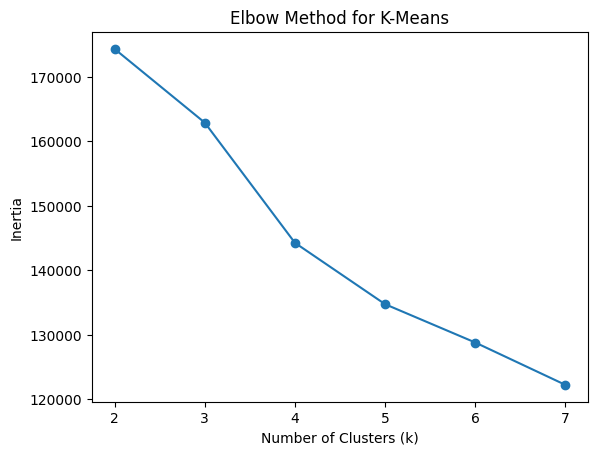


========== K-MEANS CLUSTERING ==========
Cluster
1    9527
2    1757
0    1046
Name: count, dtype: int64


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# -----------------------------------------
# 1) Load dataset
# -----------------------------------------
url = "https://raw.githubusercontent.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/master/online_shoppers_intention.csv"
df = pd.read_csv(url)

# Convert boolean target to numeric
df["Revenue"] = df["Revenue"].astype(int)


# -----------------------------------------
# 2) Split Features & Target
# -----------------------------------------
y = df["Revenue"]
X = df.drop("Revenue", axis=1)

# Select columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()


# -----------------------------------------
# 3) Preprocessing: Scale numeric + OneHotEncode categorical
# -----------------------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

# Transform features
X_processed = preprocessor.fit_transform(X)


# -----------------------------------------
# 4) Train-test split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


# -----------------------------------------
# 5) Ridge Regression
# -----------------------------------------
ridge = Ridge()
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2")
ridge_cv.fit(X_train, y_train)

ridge_best = ridge_cv.best_estimator_
ridge_pred = ridge_best.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("========== RIDGE REGRESSION ==========")
print("Best Alpha:", ridge_cv.best_params_)
print("RMSE:", ridge_rmse)
print("R2 Score:", r2_score(y_test, ridge_pred))


# -----------------------------------------
# 6) Lasso Regression
# -----------------------------------------
lasso = Lasso(max_iter=30000)
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]}

lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring="r2")
lasso_cv.fit(X_train, y_train)

lasso_best = lasso_cv.best_estimator_
lasso_pred = lasso_best.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print("\n========== LASSO REGRESSION ==========")
print("Best Alpha:", lasso_cv.best_params_)
print("RMSE:", lasso_rmse)
print("R2 Score:", r2_score(y_test, lasso_pred))


# -----------------------------------------
# 7) K-Means Clustering
# -----------------------------------------
inertia_vals = []
k_values = range(2, 8)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_processed)
    inertia_vals.append(km.inertia_)

# Plot elbow graph
plt.plot(k_values, inertia_vals, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

# Choose final cluster count
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

df["Cluster"] = clusters

print("\n========== K-MEANS CLUSTERING ==========")
print(df["Cluster"].value_counts())
